In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
spanishStemmer = stopwords.words('spanish')
import regex
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim
from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [452]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
from sklearn.decomposition import PCA
from datetime import datetime


In [145]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.32):
        descipcion="Positivo"
    elif(numero>=-0.34):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

In [266]:
def desc_sentimiento2(row):
    numero = row['compound']
    if(numero>=0.32):
        descipcion=-1
    elif(numero>=-0.34):
        descipcion=0
    else:
        descipcion=1
    return descipcion

In [172]:
from deep_translator import GoogleTranslator
def traduccion(to_translate):
    print(to_translate)
    print(len(to_translate))
    if len(to_translate)>1:
        translated = GoogleTranslator(source='es', target='english').translate(to_translate)
    else:
        translated = "NAN"
    return translated

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in spanishStemmer])
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

In [7]:
def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         stopwords=spanishStemmer,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

In [542]:
def calcular_fecha_playstore(variable):
    variable = variable.split()
    mese={'January':'01', 'February':'02', 'March':'03', 'April':'04', 
          'May' :'05' , 'June':'06' , 'July':'07', 'August':'08' , 'September':'09' , 'October':'10' , 'November':'11' , 'December':'12'}
    mes=variable[0][2:30]
    dia=variable[1][0:2].replace(",", "")
    if(int(dia)<10):
        dia="0"+dia
    else:
        dia=dia
    ano=variable[2][2:4]
    mes_campo=mese[mes]
    try:
        mes_campo=mese[mes]
    except KeyError as e:
        return ""
    else:
        mes_campo=mese[mes]
    mes_dato_texto=dia+"/"+mes_campo+"/"+ano+' 01:55:19'
    fecha_consolidada=str(ano)+"-"+str(mes_campo)
    #fecha_consolidada= datetime.strptime(mes_dato_texto, '%d/%m/%y %H:%M:%S')   
    return fecha_consolidada

In [8]:
datos_twitter=pd.read_excel("C:/Users/ASUS/Downloads/example.xlsx")
datos_playstore= pd.read_excel("C:/Users/ASUS/Downloads/example_playstore.xlsx")
instagram_data=pd.read_excel("C:/Users/ASUS/Downloads/instagram.xlsx")
facebook_data=pd.read_excel("C:/Users/ASUS/Downloads/facebook_data.xlsx")
facebook_comentarios=pd.read_excel("C:/Users/ASUS/Downloads/facebook_comentarios.xlsx")

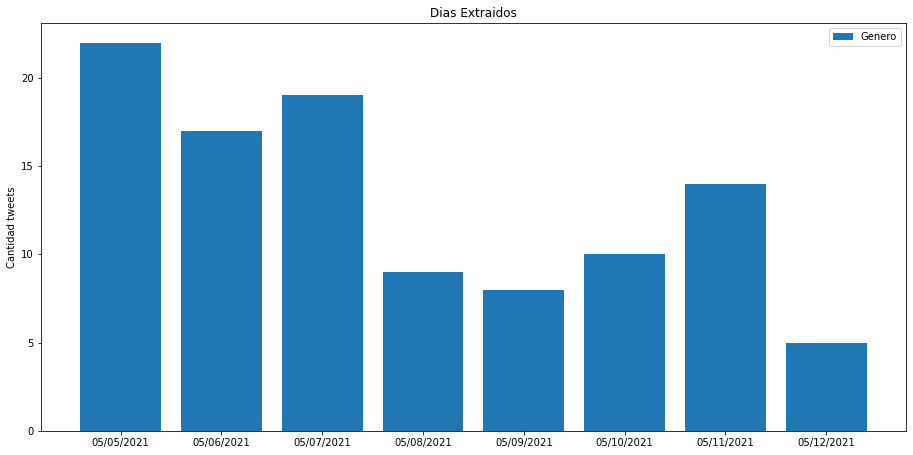

In [9]:
datos_twitter['validador']=1
datos_twitter['dia_publicacion']=datos_twitter['date'].dt.strftime('%m/%d/%Y')

agrupacion_pais = datos_twitter.groupby(['dia_publicacion'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["dia_publicacion"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad tweets')
ax.set_title('Dias Extraidos')
ax.legend()
plt.show()

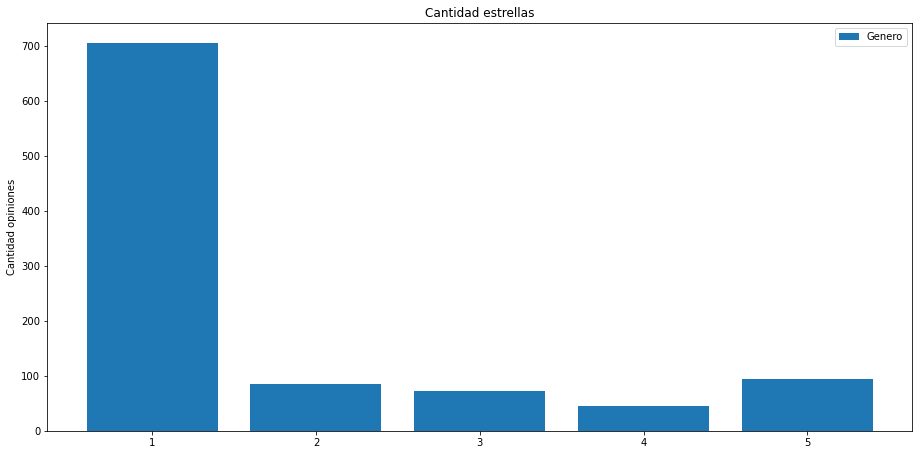

In [10]:
datos_playstore['validador']=1
datos_playstore['cantidad_estrellas']=datos_playstore['cantidad_estrellas']

agrupacion_pais = datos_playstore.groupby(['cantidad_estrellas'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["cantidad_estrellas"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad opiniones')
ax.set_title('Cantidad estrellas')
ax.legend()
plt.show()

In [18]:
facebook_data.head()

Unnamed: 0           post_id                time  \
0           0  3120412334944274 2021-05-18 06:00:08   
1           1  3117872838531557 2021-05-16 18:27:01   
2           2  3120161568302684 2021-05-15 06:07:29   
3           3  3120240761628098 2021-05-14 15:10:50   
4           4  3120014814984026 2021-05-13 15:30:00   

                                                text  likes  shares  \
0  ¡Salir de deudas es posible!\nY para hacerlo r...     10       0   
1  💳 Con tus Tarjetas Crédito o Débito del Banco ...      9       0   
2  Aprovecha este mes para celebrar por el amor d...     33       2   
3  Descargando AV Villas App, podrás descubrir un...     14       1   
4  🚨Hacemos un llamado al público en general para...     22      14   

                 reactions                                      comments_full  \
0             {'like': 10}  [{'comment_id': '3124423901209784', 'comment_u...   
1              {'like': 9}                                                 []   
2  {'like': 30, 'love': 3}  [{'comment_id': '3121663018152539', 'comment_u...   
3             {'like': 14}  [{'comment_id': '3121663181485856', 'comment_u...   
4             {'like': 22}  [{'comment_id': '3120922474893260', 'comment_u...   

   like  haha  anger  love  support  
0    10     0      0     0        0  
1     9     0      0     0        0  
2    30     0      0     3        0  
3    14     0      0     0        0  
4    22     0      0     0        0

In [28]:
#data_agrupada=pd.DataFrame()
datos_like={}
datos_haha={}
datos_anger={}
datos_love={}
datos_support={}
datos_like['cantidad']=facebook_data.like
datos_like["tipo"]="like"
datos_like=pd.DataFrame(datos_like,columns=['cantidad','tipo'])

datos_haha['cantidad']=facebook_data.haha
datos_haha["tipo"]="haha"
datos_haha=pd.DataFrame(datos_haha,columns=['cantidad','tipo'])

datos_anger['cantidad']=facebook_data.anger
datos_anger["tipo"]="anger"
datos_anger=pd.DataFrame(datos_anger,columns=['cantidad','tipo'])

datos_love['cantidad']=facebook_data.love
datos_love["tipo"]="love"
datos_love=pd.DataFrame(datos_love,columns=['cantidad','tipo'])

datos_support['cantidad']=facebook_data.support
datos_support["tipo"]="support"
datos_support=pd.DataFrame(datos_support,columns=['cantidad','tipo'])

data_agrupada=datos_like
#data_agrupada = data_agrupada.append(pd.DataFrame(datos_like,columns=['cantidad','tipo'], as_index = False), sort=False)
data_agrupada = data_agrupada.append(datos_haha, sort=False)
data_agrupada = data_agrupada.append(datos_anger, sort=False)
data_agrupada = data_agrupada.append(datos_love, sort=False)
data_agrupada = data_agrupada.append(datos_support, sort=False)

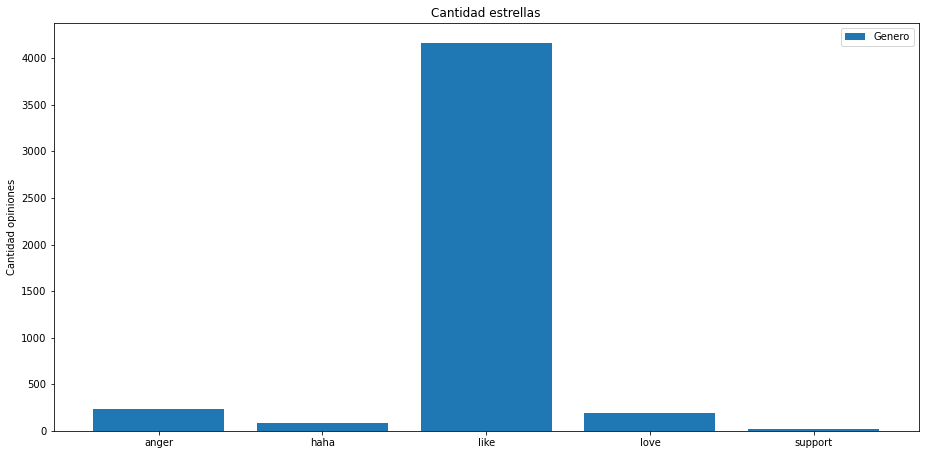

In [29]:
data_agrupada['validador']=1
data_agrupada['tipo']=data_agrupada['tipo']

agrupacion_pais = data_agrupada.groupby(['tipo'], as_index = False)[['cantidad']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["tipo"]
men_means =agrupacion_pais["cantidad"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad opiniones')
ax.set_title('Cantidad estrellas')
ax.legend()
plt.show()

In [30]:
 data_agrupada.groupby(['tipo'], as_index = False)[['cantidad']].sum()

tipo  cantidad
0    anger       238
1     haha        83
2     like      4169
3     love       193
4  support        21

# Gestion

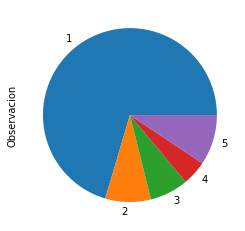

In [62]:
datos_playstore.groupby('cantidad_estrellas').count()["Observacion"].plot(kind='pie')

In [83]:
data_store_agrup=pd.DataFrame(columns=['cantidad','tipo'])
data_store_agrup = data_store_agrup.append({'cantidad': datos_playstore.count()['Observacion'],'tipo': "Observaciones"}, ignore_index=True)
data_store_agrup = data_store_agrup.append({'cantidad': (datos_playstore[datos_playstore['Respuesta']!="Nan"].count()["Observacion"]),
                                            'tipo': "Respuestas"}, ignore_index=True)
data_store_agrup

cantidad           tipo
0     1004  Observaciones
1      794     Respuestas

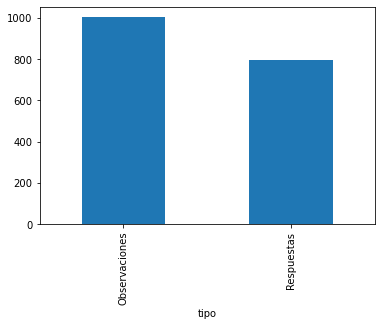

In [84]:
data_store_agrup.groupby('tipo').sum()["cantidad"].plot(kind='bar')

In [96]:
data_comentario_facebook=pd.DataFrame(columns=['cantidad','tipo'])
data_comentario_facebook = data_comentario_facebook.append({'cantidad': facebook_comentarios[facebook_comentarios['usuario']!="Banco AV Villas"].count()['comentario'],
                                                            'tipo': "Observaciones"}, ignore_index=True)
data_comentario_facebook = data_comentario_facebook.append({'cantidad': facebook_comentarios[facebook_comentarios['usuario']=="Banco AV Villas"].count()['comentario'],
                                                            'tipo': "Respuestas"}, ignore_index=True)
data_store_agrup

cantidad           tipo
0     1004  Observaciones
1      794     Respuestas

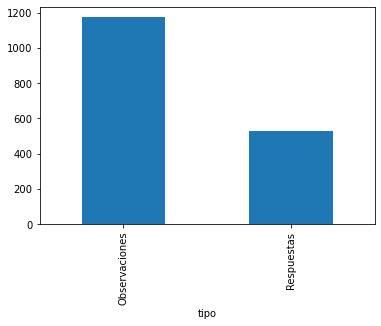

In [97]:
data_comentario_facebook.groupby('tipo').sum()["cantidad"].plot(kind='bar')

In [89]:
#datos_twitter
#datos_playstore
#instagram_data
#facebook_data
#facebook_comentarios

Unnamed: 0                       usuario  \
0              0                Astrid Ramírez   
1              1             Sebastián Montoya   
2              2                     Maik Maik   
3              3               Banco AV Villas   
4              4                     Maik Maik   
...          ...                           ...   
1698        1698  Algonu Alonso Gonzalez Uribe   
1699        1699               Banco AV Villas   
1700        1700             Andrea Brathwaite   
1701        1701                 Lucho Delgado   
1702        1702               Banco AV Villas   

                                             comentario        tipo  emojis  \
0     Todos los meses me acerco a AV villas de Diver...  Comentario      []   
1     Mi tarjeta no funciona ni con la banda magnéti...  Comentario      []   
2     Todos los bancos están abiertos hoy sábado, y ...  Comentario      []   
3     Hola Maik, con la actual situación del país lo...     Replica      []   
4     Todos los bancos están abiertos hoy sábado, y ...  Comentario      []   
...                                                 ...         ...     ...   
1698  Banco AV Villas Banco AV Villas miren el radic...     Replica      []   
1699  Hola Algonu Alonso Gonzalez Uribe, queremos br...     Replica      []   
1700  https://\nwww.facebook.com\n/1087343200/\npost...  Comentario      []   
1701  Mi app de AV VILLAS me sale con saldo bloquead...  Comentario      []   
1702  Hola Lucho Delgado, debes llamar a nuestra lín...     Replica  [📞, 😊]   

                                              procesado  
0     meses acerco av villas diver plaza siempre ent...  
1     tarjeta funciona banda magnética chip malo cam...  
2     bancos abiertos hoy sábado av villas cerrado m...  
3     hola maik actual situación país horarios ofici...  
4     bancos abiertos hoy sábado av villas cerrado m...  
...                                                 ...  
1698  banco av villas banco av villas miren radicado...  
1699  hola algonu alonso gonzalez uribe queremos bri...  
1700                       https www facebook com posts  
1701  app av villas sale saldo bloqueado semana nece...  
1702  hola lucho delgado debes llamar línea audiovil...  

[1703 rows x 6 columns]

In [31]:
spanishStemmer0 = set(stopwords.words('spanish'))

#add words that aren't in the NLTK stopwords list
new_stopwords1 = ['t', 'co']
spanishStemmer = spanishStemmer0.union(new_stopwords1)

In [32]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in spanishStemmer])
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

In [33]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

In [57]:
datos_twitter['emojis'] = datos_twitter['tweet'].apply(lambda text: get_emojis(text))
temp_emojis = pd.DataFrame(list(zip(Counter(sum(datos_twitter.emojis.values,[])).keys(),Counter(sum(datos_twitter.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados en Facebook')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [34]:
facebook_comentarios['emojis'] = facebook_comentarios['comentario'].apply(lambda text: get_emojis(text))


In [50]:
temp_emojis = pd.DataFrame(list(zip(Counter(sum(facebook_comentarios.emojis.values,[])).keys(),Counter(sum(facebook_comentarios.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados en Facebook')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [51]:
datos_playstore['emojis'] = datos_playstore['Observacion'].apply(lambda text: get_emojis(text))


In [52]:
temp_emojis = pd.DataFrame(list(zip(Counter(sum(datos_playstore.emojis.values,[])).keys(),Counter(sum(datos_playstore.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados en Play Store')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [53]:
instagram_data['emojis'] = instagram_data['comentarios_publicacion'].apply(lambda text: get_emojis(text))

In [54]:
temp_emojis = pd.DataFrame(list(zip(Counter(sum(instagram_data.emojis.values,[])).keys(),Counter(sum(instagram_data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(10)
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)
layout = go.Layout(title='Emojis más usados en Facebook')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [40]:
#facebook_comentarios[facebook_comentarios['usuario']!="Banco AV Villas"]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

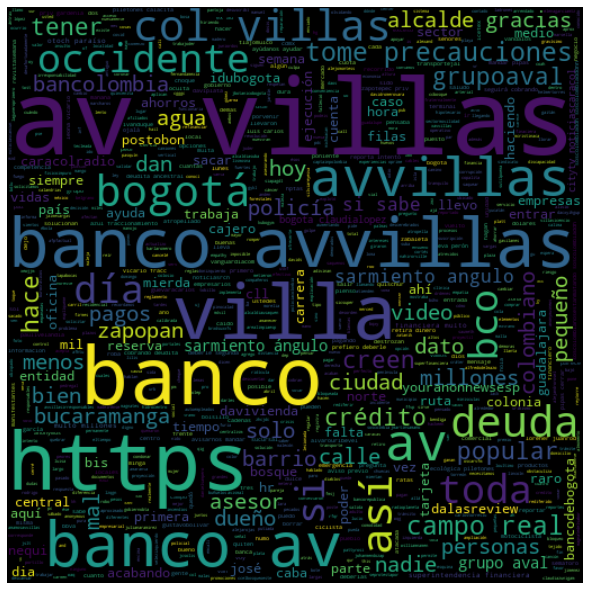

In [41]:
generar_grafico(datos_twitter["procesado"],"wine.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

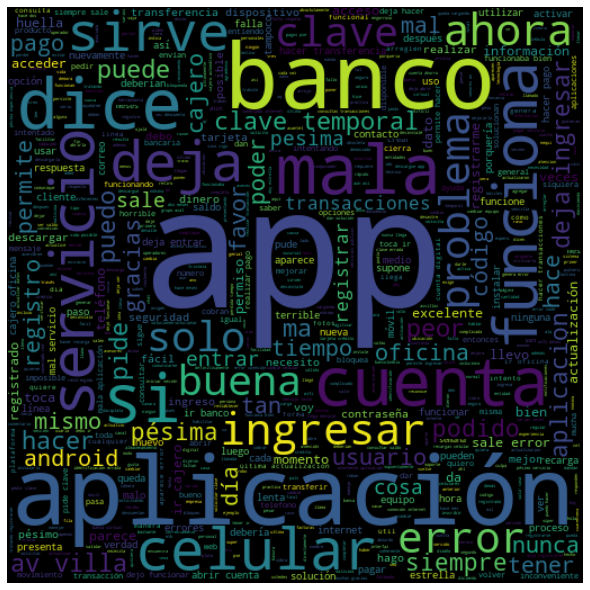

In [42]:
datos_playstore["procesado"]= datos_playstore['Observacion'].apply(lambda texto: pre_procesado(texto))
generar_grafico(datos_playstore["procesado"],"wine.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

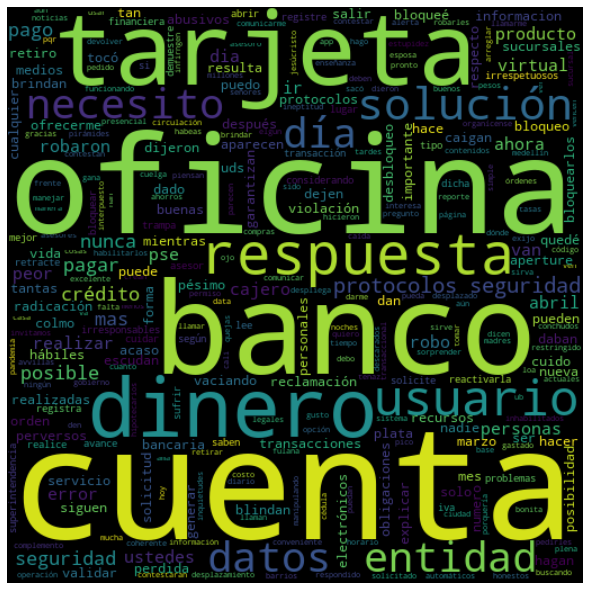

In [43]:
instagram_data["procesado"]= instagram_data['comentarios_publicacion'].apply(lambda texto: pre_procesado(texto))
generar_grafico(instagram_data["procesado"],"wine.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

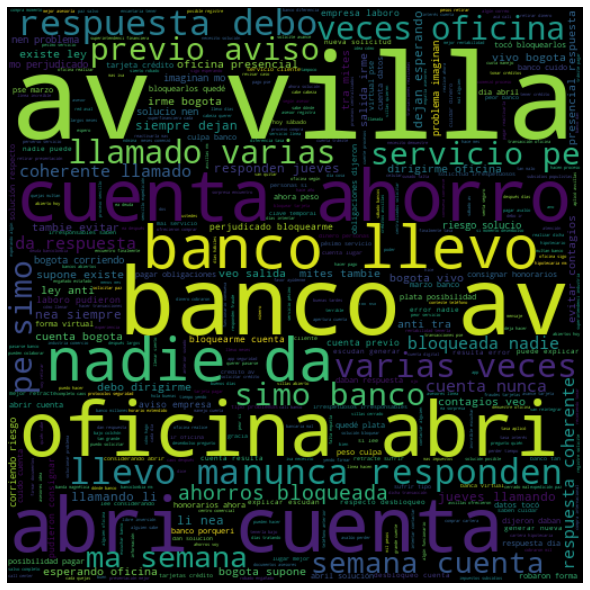

In [44]:
facebook_comentarios["procesado"]= facebook_comentarios['comentario'].apply(lambda texto: pre_procesado(texto))
facebook_comentarios1=facebook_comentarios[facebook_comentarios['usuario']!="Banco AV Villas"]

generar_grafico(facebook_comentarios1["procesado"],"wine.png")

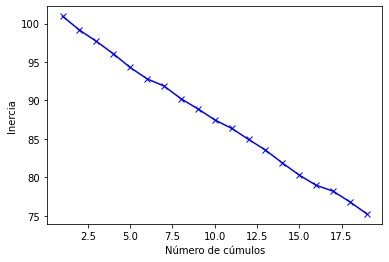

In [45]:
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(datos_twitter["procesado"].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
ks = []
k_inertia = []
for k in range(1,20):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.plot(ks, k_inertia, 'bx-')

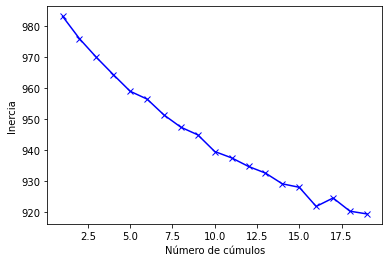

In [46]:
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(datos_playstore["procesado"].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
ks = []
k_inertia = []
for k in range(1,20):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.plot(ks, k_inertia, 'bx-')

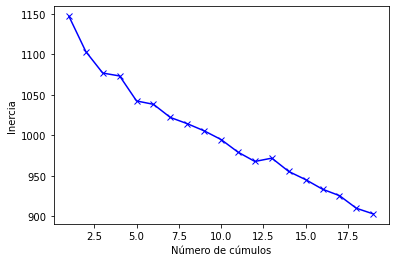

In [47]:
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(facebook_comentarios1["procesado"].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
ks = []
k_inertia = []
for k in range(1,20):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.plot(ks, k_inertia, 'bx-')

In [58]:
facebook_comentarios1["procesado2"]= facebook_comentarios1['procesado'].apply(lambda texto: texto.split())
dictionary_1 = Dictionary(facebook_comentarios1["procesado2"].values)
dictionary_1.filter_extremes(no_below=20, no_above=0.4)
corpus1 = [dictionary_1.doc2bow(text) for text in facebook_comentarios1["procesado2"].values]
model1 = LdaModel(corpus=corpus1, id2word=dictionary_1, num_topics=10, passes=60)
lda_display1 = pyLDAvis.gensim.prepare(model1, corpus1, dictionary_1, sort_topics=True)
pyLDAvis.display(lda_display1)

In [158]:
datos_playstore['procesado']=datos_playstore['procesado'].str.slice(0, 5000)
datos_playstore['Observacion_ingles']=datos_playstore['procesado'].apply(lambda text: traduccion(text))

pide cambio contraseña registro dice ir cajero mal unico deja ver cuentas si funciones pedir crédito si funcionan tiempos cuarentena pedir ir cajero mal tras hecho app súper lenta favor mejorar inter
peor aplicación seguridad puede haber tramitar banco aparte quieres realizar transacción siempre sale error procesa pago coloco estrellas puedo nunca sentí frustrado alguna aplicación excepción est
aplicación abre última actualización horror deja ver absolutamente toca ir banco exponerse pandemia crisis social vive actualmente asco total app
permite ingresar consultas transacciones podia ingresar consultar productos ahora permite desinstalado instalado tres veces funcional pesima app
pide cambio contraseña registro dice ir cajero mal unico deja ver cuentas si funciones pedir crédito si funcionan tiempos cuarentena pedir ir cajero mal tras hecho app súper lenta favor mejorar inter
peor aplicación seguridad puede haber tramitar banco aparte quieres realizar transacción siempre sale error pro

In [174]:
instagram_data["procesado"]= instagram_data['comentarios_publicacion'].apply(lambda texto: pre_procesado(texto))
instagram_data['procesado']=instagram_data['procesado'].str.slice(0, 5000)
instagram_data['comentarios_publicacion_ingles']=instagram_data['procesado'].apply(lambda text: traduccion(text))

nan
3
importante enseñanza usuarios caigan trampas complemento invitamos ver contenidos personas caigan pirámides
107

0
mucha falta seguridad bancaria banco robaron esposa sucursal virtual cuenta ahorros aun respondido honestos
107
cajeros automáticos inhabilitados retiro dinero hace días piensan vida ahora pueden manejar dinero gana acaso debo pedirles permiso retirar dinero manipulando circulación dinero órdenes gobierno desplazado barrios medellín sirve ningún cajero asesores oficina dicen dieron orden habilitarlos orden dejen ser tan abusivos organícense usuario restringido retiro dinero van devolver dinero gastado desplazamiento ciudad buscando cajero sirva bonita manera sorprender madres mes abusivos colmo opción pqr despliega tan conveniente
526
página hacer pagos pse caída buenas tardes cali funcionando pico cédula
71
peor banco importante salir casa
32
peor banco
10
costo realizar operación
24
colmo hagan ir oficina presencial den simple código usar app acaso ven noticias ple

In [175]:
facebook_comentarios1['procesado']=facebook_comentarios1['procesado'].str.slice(0, 5000)
facebook_comentarios1['procesado_ingles']=facebook_comentarios1['procesado'][0:4995].apply(lambda text: traduccion(text))

meses acerco av villas diver plaza siempre entregan ficha ingreso respetan ingreso acuerdo orden dan puerta centro comercial hoy persona nueva puerta av villas fila ficha esperando personas ficha dijeron misma señorita dijo pueden hacer fila van ingresar increíble contraten personal criterio simplemente sigan bueno igual va atender
333
tarjeta funciona banda magnética chip malo cambiarla puedo hacer
64
bancos abiertos hoy sábado av villas cerrado mal alguien sabe dónde banco av villas abierto hoy sábado
102
bancos abiertos hoy sábado av villas cerrado mal alguien sabe dónde banco av villas abierto hoy sábado
102
bancos calladitos van quitar x
30
cruz parra
10
envía clave temporal momento pago pse
37
asco banco dan solución problemas solo saben robarle gente
58
verdad cobran
13
hola buenas tardes día banco marca casa menos mes active linea favor dejen marcar pesados debo dije numero menos mes
116
mal servicio banco necesito clave temporal dicen comunique audio av villas respuesta debo i

In [ ]:
#datos_twitter
#datos_playstore
#instagram_data
#facebook_data
#facebook_comentarios

In [177]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(datos_playstore['Observacion_ingles'])
datos_playstore['neg'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
datos_playstore['neu'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
datos_playstore['pos'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
datos_playstore['compound'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
datos_playstore['sentimiento'] = datos_playstore.apply(desc_sentimiento, axis=1, result_type='expand')
datos_playstore.head()

Unnamed: 0                             Usuario  cantidad_estrellas  \
0           0      ['Luz Helena Jimenez Carreño']                   2   
1           1          ['Rodrigo Murillo Acosta']                   1   
2           2  ['DIANA DEL PILAR MEDINA AGUILAR']                   1   
3           3  ['Martha Sofia Rangel Villamizar']                   1   
4           4      ['Luz Helena Jimenez Carreño']                   2   

                fecha                                        Observacion  \
0  ['April 29, 2021']  Pide cambio de contraseña para registro y dice...   
1     ['May 5, 2021']  La peor aplicación de seguridad que puede habe...   
2     ['May 7, 2021']  La aplicación no abre desde la última actualiz...   
3     ['May 4, 2021']  No permite ingresar a consultas y transaccione...   
4  ['April 29, 2021']  Pide cambio de contraseña para registro y dice...   

                                           Respuesta  validador emojis  \
0                                                Nan          1     []   
1                                                Nan          1     []   
2  Queremos saber si la aplicación sigue presenta...          1    [🤮]   
3                                                Nan          1     []   
4                                                Nan          1     []   

                                           procesado  \
0  pide cambio contraseña registro dice ir cajero...   
1  peor aplicación seguridad puede haber tramitar...   
2  aplicación abre última actualización horror de...   
3  permite ingresar consultas transacciones podia...   
4  pide cambio contraseña registro dice ir cajero...   

                                  Observacion_ingles    neg    neu    pos  \
0  request change password register says go cashi...  0.143  0.605  0.253   
1  worst security application may have process ba...  0.178  0.653  0.169   
2  application opens last update horror lets see ...  0.459  0.541  0.000   
3  allows to enter inquiries transactions could e...  0.128  0.872  0.000   
4  request change password register says go cashi...  0.143  0.605  0.253   

   compound sentimiento  
0    0.6249    Positivo  
1   -0.3235      Neutro  
2   -0.9273    Negativo  
3   -0.3612    Negativo  
4    0.6249    Positivo

In [183]:
data_pos=datos_playstore[[ 'Observacion','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

Observacion    pos
274                            Buena pero no excelente  1.000
886                  Es excelente. Muy comoda y segura  0.868
989                        Muy buena apps recomiendada  0.825
119    Muy buena app. Funciona todo muy bien excelente  0.808
576  Buena app, ahorra diligencias y siempre permit...  0.784
831       Excelentemente bien Es muy rápido y sencillo  0.767
955                             Interfaz poco amigable  0.762
774       buena aplicación, todo un servicio a la mano  0.753
816                              Muy buena aplicación.  0.744
927                          Buena y fácil de utilizar  0.744

In [187]:
data_neg=datos_playstore[[ 'Observacion','Respuesta','neg']].sort_values('neg',ascending=False)
data_neg.head(10)

Observacion  \
594                            Malo el servicio,pesimo   
263  Pésima app, pésimo servicio, pésimo banco. Lo ...   
918                     Falla mucho, error de conexión   
868                  Lo peor que hay en bancos es este   
887        Atención confusa y demorados los resultados   
909           La aplicación no funciona, que desastre.   
860                               Lo peor en app banca   
837  Pésima, no funciona y los funcionarios también...   
983                  muy regular...se bloquea mucho...   
904  No me deja ingresar sale identificación errada...   

                                             Respuesta    neg  
594                                                Nan  0.875  
263                                                Nan  0.862  
918  Hola, Mauricio. Recuerda que para el correcto ...  0.846  
868  Hola, Wen. Para este tipo de inquietudes te in...  0.804  
887  Hola Silvio: Queremos saber si la aplicación s...  0.677  
909  Queremos saber lo que te pasó y ayudarte, cont...  0.672  
860                                                Nan  0.672  
837  Hola Oneida, cuéntanos lo que te ocurrió y así...  0.660  
983  Hola, Ivvonne, queremos saber si la aplicación...  0.655  
904  Queremos saber si la aplicación sigue presenta...  0.650

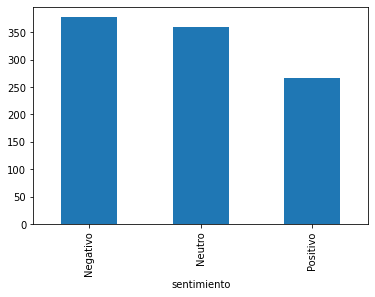

In [191]:
datos_playstore.groupby('sentimiento').count()["Observacion"].plot(kind='bar')

In [228]:
datos_playstore['pp']= datos_playstore['procesado'].apply(lambda texto: texto.split()) 
dictionary = Dictionary(datos_playstore['pp'].values)
dictionary.filter_extremes(no_below=16, no_above=0.4)
corpus = [dictionary.doc2bow(text) for text in datos_playstore['pp'].values]
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=200)
model.print_topics(16)

[(0,
  '0.070*"app" + 0.037*"error" + 0.036*"deja" + 0.034*"ingresar" + 0.032*"cuenta" + 0.030*"aplicación" + 0.026*"funciona" + 0.021*"banco" + 0.020*"dice" + 0.019*"sale"'),
 (1,
  '0.044*"hacer" + 0.042*"clave" + 0.039*"aplicación" + 0.033*"app" + 0.032*"banco" + 0.024*"q" + 0.023*"cajero" + 0.023*"ir" + 0.022*"mala" + 0.020*"pide"')]

In [229]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [219]:
datos_playstore

Unnamed: 0                             Usuario  cantidad_estrellas  \
0              0      ['Luz Helena Jimenez Carreño']                   2   
1              1          ['Rodrigo Murillo Acosta']                   1   
2              2  ['DIANA DEL PILAR MEDINA AGUILAR']                   1   
3              3  ['Martha Sofia Rangel Villamizar']                   1   
4              4      ['Luz Helena Jimenez Carreño']                   2   
...          ...                                 ...                 ...   
999          999                ['cristhian molina']                   3   
1000        1000                  ['Andres Herrera']                   1   
1001        1001             ['Jose Ernesto Unriza']                   5   
1002        1002                ['Héctor Matamoros']                   3   
1003        1003          ['Manuel Jimenez Payares']                   4   

                       fecha  \
0         ['April 29, 2021']   
1            ['May 5, 2021']   
2            ['May 7, 2021']   
3            ['May 4, 2021']   
4         ['April 29, 2021']   
...                      ...   
999          ['May 2, 2019']   
1000  ['September 17, 2019']   
1001      ['March 11, 2021']   
1002      ['April 20, 2020']   
1003  ['September 23, 2020']   

                                            Observacion  \
0     Pide cambio de contraseña para registro y dice...   
1     La peor aplicación de seguridad que puede habe...   
2     La aplicación no abre desde la última actualiz...   
3     No permite ingresar a consultas y transaccione...   
4     Pide cambio de contraseña para registro y dice...   
...                                                 ...   
999   no me queda claro si tiene algun costo el uso ...   
1000  Esta App no sirve para nada me duro dos dias b...   
1001                        Muy buena la información ¡!   
1002  Lo siento no me han contestado sobre los plazo...   
1003                  Muy buena app, podría mejorar 💪👍😎   

                                              Respuesta  validador     emojis  \
0                                                   Nan          1         []   
1                                                   Nan          1         []   
2     Queremos saber si la aplicación sigue presenta...          1        [🤮]   
3                                                   Nan          1         []   
4                                                   Nan          1         []   
...                                                 ...        ...        ...   
999   Hola, Cristhian, descargar la aplicación no ti...          1         []   
1000  Queremos saber si la aplicación sigue presenta...          1         []   
1001      Muchas gracias por tus comentarios. ¡Saludos!          1         []   
1002  Hola, Héctor. Para este tipo de inquietudes te...          1         []   
1003      Muchas gracias por tus comentarios. ¡Saludos!          1  [💪, 👍, 😎]   

                                              procesado  \
0     pide cambio contraseña registro dice ir cajero...   
1     peor aplicación seguridad puede haber tramitar...   
2     aplicación abre última actualización horror de...   
3     permite ingresar consultas transacciones podia...   
4     pide cambio contraseña registro dice ir cajero...   
...                                                 ...   
999   queda claro si algun costo uso app descuesta c...   
1000    app sirve duro dos dias bien luego solo errores   
1001                                  buena información   
1002  siento contestado plazos pago diferido tarjeta...   
1003                           buena app podría mejorar   

                                     Observacion_ingles    neg    neu    pos  \
0     request change password register says go cashi...  0.143  0.605  0.253   
1     worst security application may have process ba...  0.178  0.653  0.169   
2     application opens last update horror lets see ...  0.459  0.541  0.000 

In [178]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(instagram_data['comentarios_publicacion_ingles'])
instagram_data['neg'] = instagram_data['comentarios_publicacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
instagram_data['neu'] = instagram_data['comentarios_publicacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
instagram_data['pos'] = instagram_data['comentarios_publicacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
instagram_data['compound'] = instagram_data['comentarios_publicacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
instagram_data['sentimiento'] = instagram_data.apply(desc_sentimiento, axis=1, result_type='expand')
instagram_data.head()

Unnamed: 0                   id    shortcode  dimensions  \
0           0  2574701972226019469  CO7Lc1pB5CN         NaN   
1           1  2574153255743719379  CO5Or9mBQfT         NaN   
2           2  2573426362770925849  CO2paRwlikZ         NaN   
3           3  2569793595586725268  COpvajrBUWU         NaN   
4           4  2567660310798768390  COiKXLZB5kG         NaN   

                                         display_url  tagged_users  \
0  https://instagram.fbog6-1.fna.fbcdn.net/v/t51....           NaN   
1  https://instagram.fbog6-1.fna.fbcdn.net/v/t51....           NaN   
2  https://instagram.fbog6-1.fna.fbcdn.net/v/t51....           NaN   
3  https://instagram.fbog6-1.fna.fbcdn.net/v/t51....           NaN   
4  https://instagram.fbog6-1.fna.fbcdn.net/v/t51....           NaN   

   fact_check_overall_rating  fact_check_information  is_video  \
0                        NaN                     NaN     False   
1                        NaN                     NaN      True   
2                        NaN                     NaN     False   
3                        NaN                     NaN     False   
4                        NaN                     NaN     False   

                               accessibility_caption  ...  full_name  \
0  Photo by Banco AV Villas on May 16, 2021. May ...  ...        NaN   
1                                                NaN  ...        NaN   
2  Photo by Banco AV Villas on May 14, 2021. May ...  ...        NaN   
3  Photo by Banco AV Villas on May 09, 2021. May ...  ...        NaN   
4  Photo by Banco AV Villas on May 06, 2021. May ...  ...        NaN   

                             comentarios_publicacion     emojis  \
0                                                NAN         []   
1  Importante esta enseñanza para que los usuario...         []   
2                                                👏👏👏  [👏, 👏, 👏]   
3  Mucha falta de seguridad bancaria de el banco....         []   
4  No tengo nada porque tienen los cajeros automá...        [😮]   

                                           procesado  \
0                                                nan   
1  importante enseñanza usuarios caigan trampas c...   
2                                                      
3  mucha falta seguridad bancaria banco robaron e...   
4  cajeros automáticos inhabilitados retiro diner...   

                      comentarios_publicacion_ingles    neg    neu    pos  \
0                                                nan  0.000  1.000  0.000   
1  important teaching users fall traps complement...  0.000  0.764  0.236   
2                                                NAN  0.000  1.000  0.000   
3  much lack banking security bank stolen wife vi...  0.259  0.472  0.269   
4  ATMs disabled withdraw money for days they thi...  0.188  0.746  0.066   

   compound sentimiento  
0    0.0000      Neutro  
1    0.3400    Positivo  
2    0.0000      Neutro  
3    0.0516      Neutro  
4   -0.9206    Negativo  

[5 rows x 28 columns]

In [195]:
data_pos=instagram_data[[ 'comentarios_publicacion','pos']].sort_values('pos',ascending=False)
data_pos.head(6)

comentarios_publicacion    pos
3   Mucha falta de seguridad bancaria de el banco....  0.269
1   Importante esta enseñanza para que los usuario...  0.236
5   Su página para hacer pagos por PSE está caída?...  0.225
10  Necesito las informacion, elgun numero que me ...  0.188
11  Señores en la vida he tenido ub producto con u...  0.155
4   No tengo nada porque tienen los cajeros automá...  0.066

In [196]:
data_neg=instagram_data[[ 'comentarios_publicacion','neg']].sort_values('neg',ascending=False)
data_neg.head(6)

comentarios_publicacion    neg
7                           El PEOR BANCO DE TODOS! 🤢  0.804
6   El PEOR BANCO DE TODOS! 🤢 Importante para no s...  0.506
3   Mucha falta de seguridad bancaria de el banco....  0.259
4   No tengo nada porque tienen los cajeros automá...  0.188
11  Señores en la vida he tenido ub producto con u...  0.188
10  Necesito las informacion, elgun numero que me ...  0.144

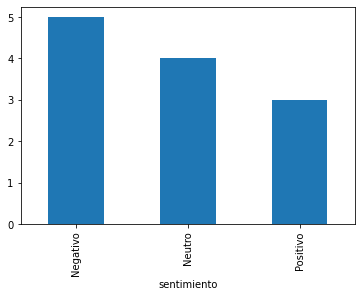

In [198]:
instagram_data.groupby('sentimiento').count()["comentarios_publicacion"].plot(kind='bar')

In [179]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(facebook_comentarios1['procesado_ingles'])
facebook_comentarios1['neg'] = facebook_comentarios1['procesado_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
facebook_comentarios1['neu'] = facebook_comentarios1['procesado_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
facebook_comentarios1['pos'] = facebook_comentarios1['procesado_ingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
facebook_comentarios1['compound'] = facebook_comentarios1['procesado_ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
facebook_comentarios1['sentimiento'] = facebook_comentarios1.apply(desc_sentimiento, axis=1, result_type='expand')
facebook_comentarios1.head()

Unnamed: 0            usuario  \
0           0     Astrid Ramírez   
1           1  Sebastián Montoya   
2           2          Maik Maik   
4           4          Maik Maik   
6           6      Shirley Abril   

                                          comentario        tipo emojis  \
0  Todos los meses me acerco a AV villas de Diver...  Comentario     []   
1  Mi tarjeta no funciona ni con la banda magnéti...  Comentario     []   
2  Todos los bancos están abiertos hoy sábado, y ...  Comentario     []   
4  Todos los bancos están abiertos hoy sábado, y ...  Comentario     []   
6  Los bancos muy calladitos , cuando van a quita...  Comentario     []   

                                           procesado  \
0  meses acerco av villas diver plaza siempre ent...   
1  tarjeta funciona banda magnética chip malo cam...   
2  bancos abiertos hoy sábado av villas cerrado m...   
4  bancos abiertos hoy sábado av villas cerrado m...   
6                     bancos calladitos van quitar x   

                                          procesado2  \
0  [meses, acerco, av, villas, diver, plaza, siem...   
1  [tarjeta, funciona, banda, magnética, chip, ma...   
2  [bancos, abiertos, hoy, sábado, av, villas, ce...   
4  [bancos, abiertos, hoy, sábado, av, villas, ce...   
6               [bancos, calladitos, van, quitar, x]   

                                    procesado_ingles    neg    neu    pos  \
0  months about av villas diver plaza always deli...  0.000  0.842  0.158   
1  card works magnetic stripe bad chip change it ...  0.259  0.741  0.000   
2  banks open today saturday av villas closed bad...  0.162  0.838  0.000   
4  banks open today saturday av villas closed bad...  0.162  0.838  0.000   
6                  quiet banks are going to remove x  0.000  1.000  0.000   

   compound sentimiento  
0    0.8481    Positivo  
1   -0.5423    Negativo  
2   -0.4767    Negativo  
4   -0.4767    Negativo  
6    0.0000      Neutro

In [201]:
data_pos=facebook_comentarios1[[ 'procesado','pos']].sort_values('pos',ascending=False)
data_pos.head(6)

procesado  pos
354      interesa  1.0
34       interesa  1.0
274      interesa  1.0
1065  felicidades  1.0
1062         bien  1.0
194      interesa  1.0

In [202]:
data_neg=facebook_comentarios1[[ 'procesado','neg']].sort_values('neg',ascending=False)
data_neg.head(6)

procesado    neg
928              terrible  1.000
1287                 peor  1.000
1097                 peor  1.000
1078               engaño  1.000
924   peor banco abusivos  0.892
1684     malvado instinto  0.815

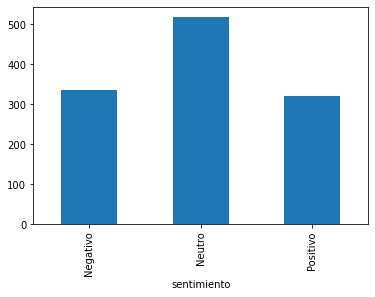

In [205]:
facebook_comentarios1.groupby('sentimiento').count()["procesado"].plot(kind='bar')

In [230]:
facebook_comentarios1['pp']= facebook_comentarios1['procesado'].apply(lambda texto: texto.split()) 
dictionary = Dictionary(facebook_comentarios1['pp'].values)
dictionary.filter_extremes(no_below=16, no_above=0.4)
corpus = [dictionary.doc2bow(text) for text in datos_playstore['pp'].values]
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=200)
model.print_topics(16)

[(0,
  '0.082*"deja" + 0.058*"error" + 0.054*"cuenta" + 0.026*"siempre" + 0.025*"banco" + 0.024*"mal" + 0.023*"hace" + 0.022*"mas" + 0.021*"sirve" + 0.021*"app"'),
 (1,
  '0.120*"app" + 0.056*"hacer" + 0.054*"clave" + 0.048*"banco" + 0.030*"q" + 0.029*"ir" + 0.027*"si" + 0.025*"solo" + 0.025*"puedo" + 0.024*"temporal"')]

In [231]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [206]:
datos_twitter['sentimiento'] = datos_twitter.apply(desc_sentimiento, axis=1, result_type='expand')
datos_twitter.head()

Unnamed: 0                                              tweet  \
0           0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_...   
1           1  @paulivelandia @williamnamen @Bogota @ClaudiaL...   
2           2  Que banco de mierda es @AMAMOSAVVILLAS @Banco_...   
3           3  @Banco_AvVillas explíqueme cómo es posible que...   
4           4  @alejomontess @PattyRosi24 @Alexand39727033 @c...   

                 date          location place  coordinates  \
0 2021-05-12 12:16:52          Colombia   NaN          NaN   
1 2021-05-12 02:14:27  Bogotá, Colombia   NaN          NaN   
2 2021-05-11 19:06:00               NaN   NaN          NaN   
3 2021-05-11 17:11:43               NaN   NaN          NaN   
4 2021-05-11 14:55:07               NaN   NaN          NaN   

                    id                                               link  \
0  1392453722266078976  https://twitter.com/i/web/status/1392453722266...   
1  1392302120402145024  https://twitter.com/i/web/status/1392302120402...   
2  1392194297915716096  https://twitter.com/i/web/status/1392194297915...   
3  1392165533710159872  https://twitter.com/i/web/status/1392165533710...   
4  1392131159413435904  https://twitter.com/i/web/status/1392131159413...   

                                           procesado  \
0  grupoaval bancodebogota bco occidente bco popu...   
1  paulivelandia williamnamen bogota claudialopez...   
2  banco mierda amamosavvillas banco avvillas rea...   
3  banco avvillas explíqueme cómo posible retiro ...   
4  alejomontess pattyrosi alexand claudiazunigam ...   

                                         tweetingles    neg    neu    pos  \
0  @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309  0.691  0.000   
1  @paulivelandia @williamnamen @Bogota @ClaudiaL...  0.000  1.000  0.000   
2  What a shitty bank is @AMAMOSAVVILLAS @Banco_A...  0.390  0.610  0.000   
3  @Banco_AvVillas explain to me how it is possib...  0.000  1.000  0.000   
4  @alejomontess @ PattyRosi24 @ Alexand39727033 ...  0.120  0.781  0.099   

   compound sentimiento emojis  validador dia_publicacion  \
0   -0.6166    Negativo     []          1      05/12/2021   
1    0.0000      Neutro     []          1      05/12/2021   
2   -0.9403    Negativo     []          1      05/11/2021   
3    0.0000      Neutro     []          1      05/11/2021   
4   -0.3749    Negativo     []          1      05/11/2021   

                                          procesado2  cluster  
0  ['grupoaval', 'bancodebogota', 'bco', 'occiden...        1  
1  ['paulivelandia', 'williamnamen', 'bogota', 'c...        1  
2  ['banco', 'mierda', 'amamosavvillas', 'banco',...        1  
3  ['banco', 'avvillas', 'explíqueme', 'cómo', 'p...        1  
4  ['alejomontess', 'pattyrosi', 'alexand', 'clau...        1

In [209]:
data_pos=datos_twitter[[ 'tweet','pos']].sort_values('pos',ascending=False)
data_pos.head(10)

tweet    pos
90   Ayúdanos a ayudar!!!!\nNequi : 325079122\nDavi...  0.319
89   Ayúdanos a ayudar!!!!\nNequi : 325079122\nDavi...  0.305
100  @CaracolRadio Av Villas con 138, plantón muy p...  0.298
47   Mañana a los de Av villas les espera una putia...  0.291
24   @quischur ese Twit hubiese sido perfecto con e...  0.270
7    @Banco_AvVillas Dios os bendiga y muy buenas t...  0.261
64   Reporta 911.\nIntentó de ejecución. \nSm259, a...  0.259
19   @quischur Menos mal no se metieron con @grupoa...  0.253
51   @CaptainPolombia @HelmerTorres6 @Gu2Hail @Gust...  0.252
14   #Anonymous para pagar el #icetex y de crédito ...  0.217

In [210]:
data_neg=datos_twitter[[ 'tweet','neg']].sort_values('neg',ascending=False)
data_neg.head(10)

tweet    neg
2   Que banco de mierda es @AMAMOSAVVILLAS @Banco_...  0.390
0   @grupoaval @BancodeBogota @Bco_Occidente @Bco_...  0.309
13  He tenido malas experiencias con diferentes ba...  0.253
65  El país vuelto mierda y los de av villas llama...  0.249
81  @carolinaguerram Llama la Atencion en Bogotá e...  0.230
18  @Banco_AvVillas \n\nSus procesos son en exceso...  0.222
67  Mi insulto adulto del día es: usted es más len...  0.216
46  Si hacen una competencia del peor banco, el pr...  0.194
86  MOTOCICLISTA LESIONADO 🚑 en Guadalajara, Col. ...  0.186
21  @Banco_AvVillas \n\nSeñores, qué falta de cont...  0.167

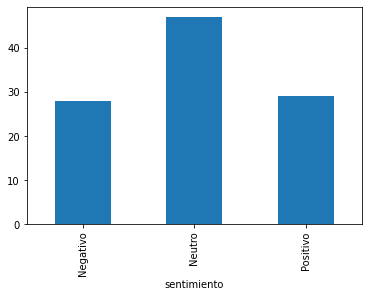

In [213]:
datos_twitter.groupby('sentimiento').count()["tweet"].plot(kind='bar')

In [274]:
#datos_twitter
#datos_playstore
#instagram_data
#facebook_data
#facebook_comentarios1

Unnamed: 0                       usuario  \
0              0                Astrid Ramírez   
1              1             Sebastián Montoya   
2              2                     Maik Maik   
4              4                     Maik Maik   
6              6                 Shirley Abril   
...          ...                           ...   
1695        1695        Lender Tovar Paternina   
1696        1696  Algonu Alonso Gonzalez Uribe   
1698        1698  Algonu Alonso Gonzalez Uribe   
1700        1700             Andrea Brathwaite   
1701        1701                 Lucho Delgado   

                                             comentario        tipo emojis  \
0     Todos los meses me acerco a AV villas de Diver...  Comentario     []   
1     Mi tarjeta no funciona ni con la banda magnéti...  Comentario     []   
2     Todos los bancos están abiertos hoy sábado, y ...  Comentario     []   
4     Todos los bancos están abiertos hoy sábado, y ...  Comentario     []   
6     Los bancos muy calladitos , cuando van a quita...  Comentario     []   
...                                                 ...         ...    ...   
1695             Tacha Muñoz siquiera donar las velitas     Replica     []   
1696  Se les va el tiempo y dinero en pura propagand...  Comentario     []   
1698  Banco AV Villas Banco AV Villas miren el radic...     Replica     []   
1700  https://\nwww.facebook.com\n/1087343200/\npost...  Comentario     []   
1701  Mi app de AV VILLAS me sale con saldo bloquead...  Comentario     []   

                                              procesado  \
0     meses acerco av villas diver plaza siempre ent...   
1     tarjeta funciona banda magnética chip malo cam...   
2     bancos abiertos hoy sábado av villas cerrado m...   
4     bancos abiertos hoy sábado av villas cerrado m...   
6                        bancos calladitos van quitar x   
...                                                 ...   
1695                 tacha muñoz siquiera donar velitas   
1696  va tiempo dinero pura propaganda resolver inqu...   
1698  banco av villas banco av villas miren radicado...   
1700                       https www facebook com posts   
1701  app av villas sale saldo bloqueado semana nece...   

                                             procesado2  \
0     [meses, acerco, av, villas, diver, plaza, siem...   
1     [tarjeta, funciona, banda, magnética, chip, ma...   
2     [bancos, abiertos, hoy, sábado, av, villas, ce...   
4     [bancos, abiertos, hoy, sábado, av, villas, ce...   
6                  [bancos, calladitos, van, quitar, x]   
...                                                 ...   
1695           [tacha, muñoz, siquiera, donar, velitas]   
1696  [va, tiempo, dinero, pura, propaganda, resolve...   
1698  [banco, av, villas, banco, av, villas, miren, ...   
1700                 [https, www, facebook, com, posts]   
1701  [app, av, villas, sale, saldo, bloqueado, sema...   

                                       procesado_ingles    neg    neu    pos  \
0     months about av villas diver plaza always deli...  0.000  0.842  0.158   
1     card works magnetic stripe bad chip change it ...  0.259  0.741  0.000   
2     banks open today saturday av villas closed bad...  0.162  0.838  0.000   
4     banks open today saturday av villas closed bad...  0.162  0.838  0.000   
6                     quiet banks are going to remove x  0.000  1.000  0.000   
...                                                 ...    ...    ...    ...   
1695                    tacha muñoz even donate candles  0.000  1.000  0.000   
1696  time goes money pure propaganda solve concerns...  0.277  0.595  0.128   
1698  bank av villas bank av villas look at file in ...  0.157  0.703  0.141   
1700                       https www facebook com posts  0.000  1.000  0.000   
1701  app av villas leaves balance blocked week urge...  0.130  0.559  0.311   

      compound sentimiento                                                 pp  
0       0

In [259]:
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(datos_playstore.procesado.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
pca = PCA(n_components=2)
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cantidad_estrellas'] = datos_playstore.cantidad_estrellas.values
result['review_body'] = datos_playstore.procesado.values
trace = go.Scatter(x=result['X'].values,
                    y=result['Y'].values,
                    text=result['review_body'].values,
                    mode='markers',
                    marker=dict(color=result['cantidad_estrellas'].values)) 
layout = go.Layout(title="PCA Comentarios Play Store")
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [271]:
datos_twitter['sentimiento2'] = datos_playstore.apply(desc_sentimiento2, axis=1, result_type='expand')
tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(datos_twitter.procesado.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
pca = PCA(n_components=2)
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['sentimiento'] = datos_twitter.sentimiento2.values
result['review_body'] = datos_twitter.procesado.values
trace = go.Scatter(x=result['X'].values,
                    y=result['Y'].values,
                    text=result['review_body'].values,
                    mode='markers',
                    marker=dict(color=result['sentimiento'].values))
layout = go.Layout(title="PCA Comentarios Twitter")
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [276]:
facebook_comentarios1['sentimiento2'] = facebook_comentarios1.apply(desc_sentimiento2, axis=1, result_type='expand')

tfidf_vect2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect2.fit_transform(facebook_comentarios1.procesado.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect2.get_feature_names())
pca = PCA(n_components=2)
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['sentimiento'] = facebook_comentarios1.sentimiento2.values
result['review_body'] = facebook_comentarios1.procesado.values
trace = go.Scatter(x=result['X'].values,
                    y=result['Y'].values,
                    text=result['review_body'].values,
                    mode='markers',
                    marker=dict(color=result['sentimiento'].values))
layout = go.Layout(title="PCA Comentarios Facebook")
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

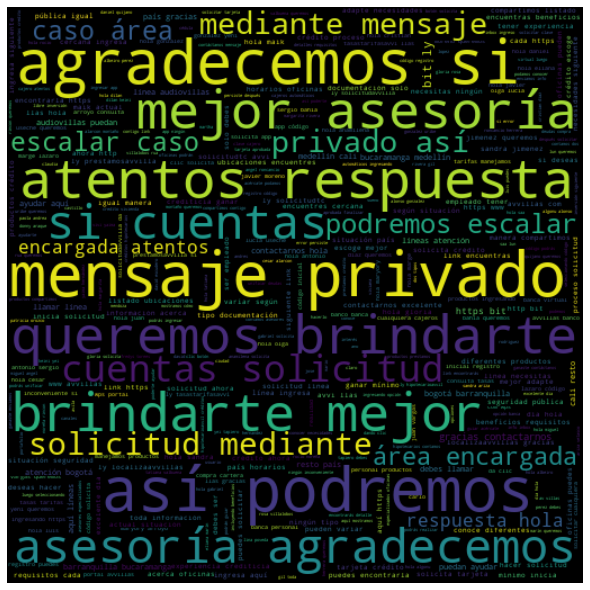

In [277]:
facebook_comentarios0=facebook_comentarios[facebook_comentarios['usuario']=="Banco AV Villas"]
generar_grafico(facebook_comentarios0["procesado"],"wine.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

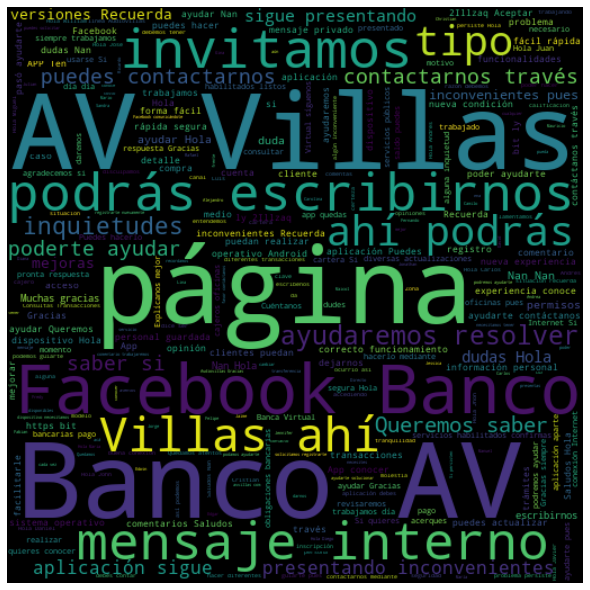

In [279]:
generar_grafico(datos_playstore["Respuesta"],"wine.png")

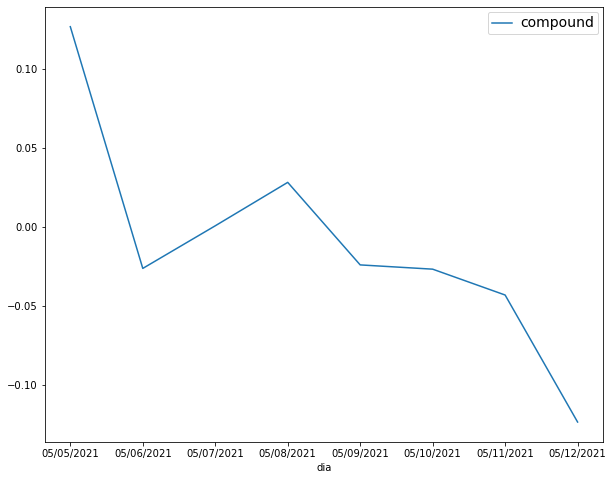

In [299]:
datos_twitter['dia']=datos_twitter['date'].dt.strftime('%m/%d/%Y')
serie_twitter= datos_twitter.groupby(['dia'], as_index = False)[['compound']].mean()
serie_twitter = serie_twitter.set_index("dia")
serie_twitter[['compound']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

In [543]:
datos_playstore['fecha_rec'] = datos_playstore['fecha'].apply(lambda text: calcular_fecha_playstore(text)) 
#datos_playstore['dia']=datos_playstore['fecha_rec'].dt.strftime('%m/%d/%Y')

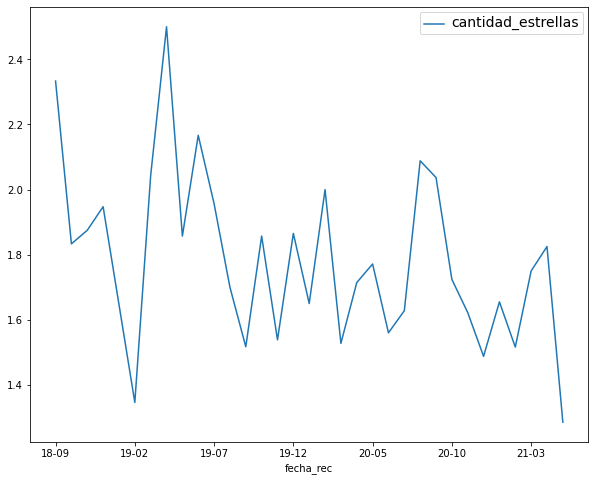

In [544]:
serie_store= datos_playstore.groupby(['fecha_rec'], as_index = False)[['cantidad_estrellas']].mean().sort_values('fecha_rec',ascending=True)
serie_store = serie_store.set_index("fecha_rec").sort_values('fecha_rec',ascending=True)
serie_store[['cantidad_estrellas']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

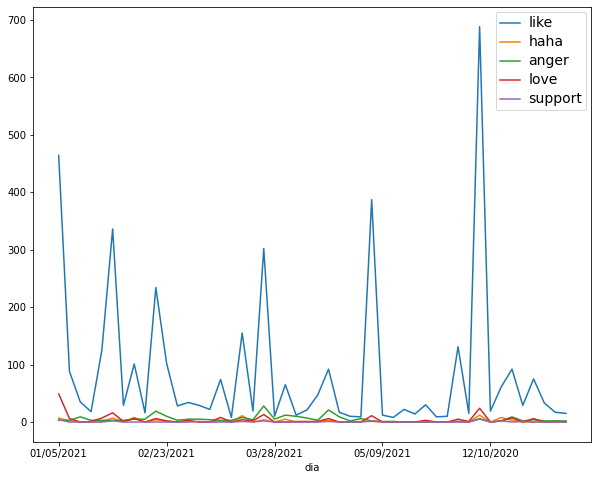

In [315]:
facebook_data['dia']=facebook_data['time'].dt.strftime('%m/%d/%Y')
serie_facebook= facebook_data.groupby(['dia'], as_index = False)[['like','haha','anger','love','support']].sum()
serie_facebook = serie_facebook.set_index("dia")
serie_facebook[['like','haha','anger','love','support']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);